In [32]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [33]:
torch.__version__

'2.2.0+cpu'

In [34]:
weight = 0.7
bias = 0.3

In [35]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [36]:
len(X), len(y)

(50, 50)

In [37]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [38]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
def plot_predictions(train_data = X_train, train_labels = y_train,test_data = X_test, test_labels = y_test, predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c='g', s=4, label ='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")
  plt.legend(prop={"size" : 14})

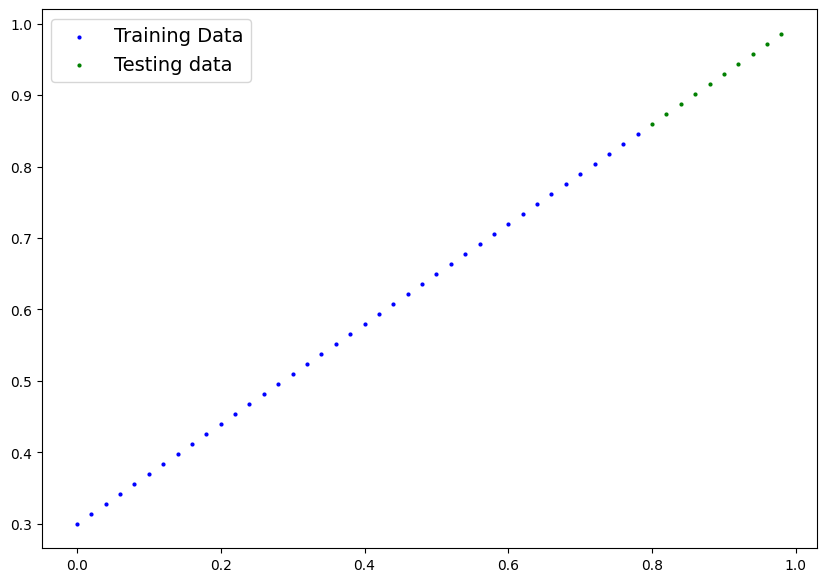

In [40]:
plot_predictions()

In [41]:

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  requires_grad = True,dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad= True,dtype =torch.float))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [42]:

random_seed = 42
torch.manual_seed(random_seed)
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [43]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
weight, bias

(0.7, 0.3)

In [46]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [47]:
with torch.inference_mode():
  y_preds = model_0(X_test)
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

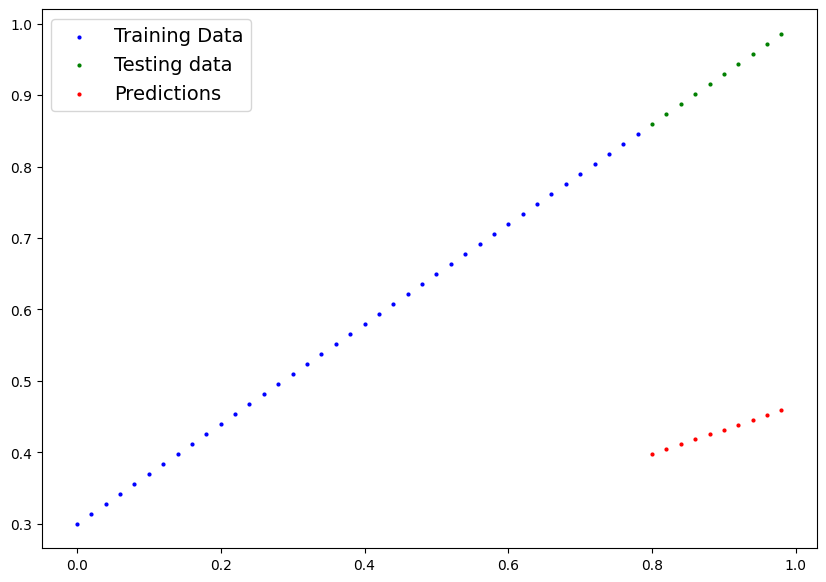

In [48]:
plot_predictions(predictions = y_preds)

In [49]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.001)

In [50]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  model_0.train()
  model_0.eval()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  print(model_0.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Loss: 0.3117292523384094
OrderedDict([('weights', tensor([0.3375])), ('bias', tensor([0.1308]))])
Loss: 0.3105771541595459
OrderedDict([('weights', tensor([0.3379])), ('bias', tensor([0.1318]))])
Loss: 0.3094250559806824
OrderedDict([('weights', tensor([0.3383])), ('bias', tensor([0.1328]))])
Loss: 0.30827295780181885
OrderedDict([('weights', tensor([0.3386])), ('bias', tensor([0.1338]))])
Loss: 0.3071208596229553
OrderedDict([('weights', tensor([0.3390])), ('bias', tensor([0.1348]))])
Loss: 0.3059687614440918
OrderedDict([('weights', tensor([0.3394])), ('bias', tensor([0.1358]))])
Loss: 0.3048166334629059
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.1368]))])
Loss: 0.30366456508636475
OrderedDict([('weights', tensor([0.3402])), ('bias', tensor([0.1378]))])
Loss: 0.3025124669075012
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.301360338

In [51]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

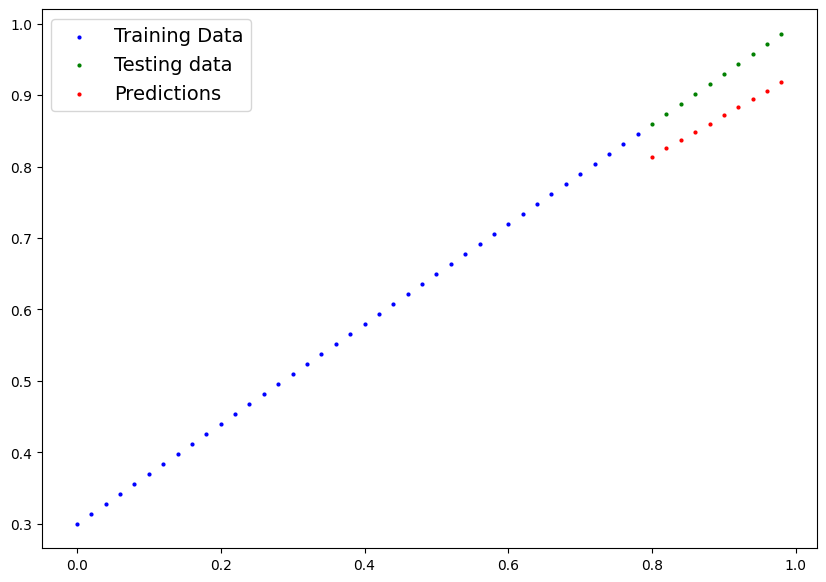

In [52]:
plot_predictions(predictions=y_preds_new)

In [53]:
with torch.inference_mode():
  test_pred = model_0(X_test)
  test_loss = loss_fn(test_pred,y_test)
print()

In [54]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [55]:
from pathlib import Path
MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)
MODEL_NAME = 'model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/model_0.pth')

In [56]:
torch.save(model_0.state_dict(), f=MODEL_SAVE_PATH)

In [57]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [58]:
loaded_model_0 = LinearRegressionModel()


In [59]:
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [60]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [61]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [62]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])